# Seattle Library Data analysis


Datasets:

* [Checkouts by Title](https://dev.socrata.com/foundry/data.seattle.gov/tmmm-ytt6)
* [Library Collection Inventory](https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf)

API docu:
* Paging through Data https://dev.socrata.com/docs/queries/
* Queries using SODA https://dev.socrata.com/docs/paging.html

In [2]:
import urllib.request
import pandas as pd

## Testing the API with the Checkouts by Title

### CSV with limited number of entries

In [3]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$limit=5"
urllib.request.urlopen(url).read()

b'"usageclass","checkouttype","materialtype","checkoutyear","checkoutmonth","checkouts","title","creator","subjects","publisher","publicationyear"\n"Physical","Horizon","BOOK","2008","2","1","Complete short fiction",,,,\n"Physical","Horizon","BOOK","2008","2","4","Slow burn",,"Love stories, Adoptees Fiction",,\n"Physical","Horizon","SOUNDDISC","2008","2","2","All time favorite dances",,"Dance music Juvenile sound recordings, Dance for children Study and teaching Juvenile sound recordings",,\n"Physical","Horizon","MUSIC","2008","2","1","The songs of John Jacob Niles, for low voice and piano [music] / with a preface by John Jacob Niles.","Niles, John Jacob, 1892-1980.","Songs Low voice with piano","G. Schirmer ; Distributed by H. Leonard,","c1993."\n"Physical","Horizon","SOUNDDISC","2008","2","2","Message",,"Songs Japanese, Popular music Japan 2001 2010",,\n'

### JSON with limited number of entries

In [4]:
# Testing Queries as described here:
# https://dev.socrata.com/docs/queries/

url = "https://data.seattle.gov/resource/tmmm-ytt6.json?$limit=5"
urllib.request.urlopen(url).read()

b'[{"usageclass":"Physical","checkouttype":"Horizon","materialtype":"BOOK","checkoutyear":"2008","checkoutmonth":"2","checkouts":"1","title":"Complete short fiction"}\n,{"usageclass":"Physical","checkouttype":"Horizon","materialtype":"BOOK","checkoutyear":"2008","checkoutmonth":"2","checkouts":"4","title":"Slow burn","subjects":"Love stories, Adoptees Fiction"}\n,{"usageclass":"Physical","checkouttype":"Horizon","materialtype":"SOUNDDISC","checkoutyear":"2008","checkoutmonth":"2","checkouts":"2","title":"All time favorite dances","subjects":"Dance music Juvenile sound recordings, Dance for children Study and teaching Juvenile sound recordings"}\n,{"usageclass":"Physical","checkouttype":"Horizon","materialtype":"MUSIC","checkoutyear":"2008","checkoutmonth":"2","checkouts":"1","title":"The songs of John Jacob Niles, for low voice and piano [music] / with a preface by John Jacob Niles.","creator":"Niles, John Jacob, 1892-1980.","subjects":"Songs Low voice with piano","publisher":"G. Schir

### CSV with selected checkout year (2018) and limited number of entries

In [5]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=5"
urllib.request.urlopen(url).read()

b'"usageclass","checkouttype","materialtype","checkoutyear","checkoutmonth","checkouts","title","creator","subjects","publisher","publicationyear"\n"Physical","Horizon","BOOK","2018","12","1","Naruto. Vol. 65, Hashirama and Madara / story and art by Masashi Kishimoto ; translation, Mari Morimoto.","Kishimoto, Masashi, 1974-","Naruto Fictitious character Comic books strips etc, Ninja Japan Comic books strips etc, Graphic novels","VIZ Media,","[2014]"\n"Physical","Horizon","BOOK","2018","12","2","Oishis\xc5\x8d na shirokuma / Shibata Keiko.","Shibata, Keiko.","Polar bear Juvenile fiction, Food Juvenile fiction, Picture books for children, Japanese language materials","P\xc4\xabeichip\xc4\xabkenky\xc5\xabjo,","2017."\n"Physical","Horizon","VIDEODISC","2018","12","7","Like crazy / Paramount Vantage ; Indian Paintbrush ; Super Crispy Entertainment ; produced by Jonathan Schwartz, Andrea Sperling ; written by Drake Doremus & Ben York Jones ; directed by Drake Doremus.",,"First loves Drama, C

### JSON with selected checkout year (2018) and limited number of entries

In [6]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.json?$where=checkoutyear=2018&$limit=5"
urllib.request.urlopen(url).read()

b'[{"usageclass":"Physical","checkouttype":"Horizon","materialtype":"BOOK","checkoutyear":"2018","checkoutmonth":"12","checkouts":"1","title":"Naruto. Vol. 65, Hashirama and Madara / story and art by Masashi Kishimoto ; translation, Mari Morimoto.","creator":"Kishimoto, Masashi, 1974-","subjects":"Naruto Fictitious character Comic books strips etc, Ninja Japan Comic books strips etc, Graphic novels","publisher":"VIZ Media,","publicationyear":"[2014]"}\n,{"usageclass":"Physical","checkouttype":"Horizon","materialtype":"BOOK","checkoutyear":"2018","checkoutmonth":"12","checkouts":"2","title":"Oishis\xc5\x8d na shirokuma / Shibata Keiko.","creator":"Shibata, Keiko.","subjects":"Polar bear Juvenile fiction, Food Juvenile fiction, Picture books for children, Japanese language materials","publisher":"P\xc4\xabeichip\xc4\xabkenky\xc5\xabjo,","publicationyear":"2017."}\n,{"usageclass":"Physical","checkouttype":"Horizon","materialtype":"VIDEODISC","checkoutyear":"2018","checkoutmonth":"12","che

## Testing the API for the Library Collection Inventory

In [7]:
url = "https://data.seattle.gov/resource/6vkj-f5xf.csv?$limit=5"
urllib.request.urlopen(url).read()

b'"bibnum","title","author","isbn","publicationyear","publisher","subjects","itemtype","itemcollection","floatingitem","itemlocation","reportdate","itemcount"\n"3011076","A tale of two friends / adapted by Ellie O\'Ryan ; illustrated by Tom Caulfield, Frederick Gardner, Megan Petasky, and Allen Tam.","O\'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481425742","2014.","Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best friends Fiction, Friendship Fiction, Adventure and adventurers Fiction","jcbk","ncrdr","Floating","qna","2017-09-01T00:00:00.000","1"\n"2248846","Naruto. Vol. 1, Uzumaki Naruto / story and art by Masashi Kishimoto ; [English adaptation by Jo Duffy].","Kishimoto, Masashi, 1974-","1569319006","2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic books strips etc Japan Translations into English, Graphic novels","acbk","nycomic","NA","lcy","2017-09-01T00:00:00.000","1"\n"3209270","Peace, love & Wi-Fi : a ZITS treasury / by Jerry Scott and 

In [8]:
url = "https://data.seattle.gov/resource/6vkj-f5xf.json?$limit=5"
urllib.request.urlopen(url).read()

b'[{"bibnum":"3011076","title":"A tale of two friends / adapted by Ellie O\'Ryan ; illustrated by Tom Caulfield, Frederick Gardner, Megan Petasky, and Allen Tam.","author":"O\'Ryan, Ellie","isbn":"1481425730, 1481425749, 9781481425735, 9781481425742","publicationyear":"2014.","publisher":"Simon Spotlight,","subjects":"Musicians Fiction, Bullfighters Fiction, Best friends Fiction, Friendship Fiction, Adventure and adventurers Fiction","itemtype":"jcbk","itemcollection":"ncrdr","floatingitem":"Floating","itemlocation":"qna","reportdate":"2017-09-01T00:00:00.000","itemcount":"1"}\n,{"bibnum":"2248846","title":"Naruto. Vol. 1, Uzumaki Naruto / story and art by Masashi Kishimoto ; [English adaptation by Jo Duffy].","author":"Kishimoto, Masashi, 1974-","isbn":"1569319006","publicationyear":"2003, c1999.","publisher":"Viz,","subjects":"Ninja Japan Comic books strips etc, Comic books strips etc Japan Translations into English, Graphic novels","itemtype":"acbk","itemcollection":"nycomic","float

In [9]:
# Filtering with "where" does not work ...

url = url = "https://data.seattle.gov/resource/6vkj-f5xf.json?$where=publicationyear=2010&$limit=5"
urllib.request.urlopen(url).read()

HTTPError: HTTP Error 400: Bad Request

## Storing API query results of the checkouts as CSV file, loading it into a pandas DataFrame and do some analyses

In [13]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7f49baca9250>)

In [14]:
checkouts_df = pd.read_csv(checkout_file)

In [15]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,The naked lady who stood on her head : a psych...,"Small, Gary, 1951-","Small Gary 1951, Psychiatry Popular works, Psy...","William Morrow,",[2010]
1,Physical,Horizon,BOOK,2018,12,1,The night of the iguana / by Tennessee Williams.,"Williams, Tennessee, 1911-1983",NaN,"Dramatists Play Service,",[1991]
2,Physical,Horizon,SOUNDDISC,2018,12,1,Tender is the night / F. Scott Fitzgerald.,"Fitzgerald, F. Scott (Francis Scott), 1896-1940","Psychiatrists Fiction, Wealth Moral and ethica...","Naxos AudioBooks,",[2010]
3,Physical,Horizon,BOOK,2018,12,1,Be prepared fishing / Henry Gilbey.,"Gilbey, Henry",Fishing,"DK Pub.,",2008.
4,Physical,Horizon,BOOK,2018,12,1,What Darwin saw : the journey that changed the...,"Schanzer, Rosalyn","Darwin Charles 1809 1882 Juvenile literature, ...","National Geographic,",[2009]
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2018,12,2,My little polar bear / Claudia Rueda.,"Rueda, Claudia","Polar bear Juvenile fiction, Bears Juvenile fi...","Scholastic Press,",2009.
9996,Digital,OverDrive,EBOOK,2018,12,1,"Love Over Scotland: 44 Scotland Street Series,...",Alexander McCall Smith,"Fiction, Humor (Fiction), Mystery","Random House, Inc.",2009
9997,Digital,OverDrive,EBOOK,2018,12,2,The India Fan,Victoria Holt,"Fiction, Historical Fiction, Romance, Suspense",Sourcebooks,2013
9998,Physical,Horizon,VIDEODISC,2018,12,5,"30 Rock. Season 7, the final season / Universa...",NaN,"Rockefeller Center Drama, Television comedy wr...","Universal Studios Home Entertainment,",[2013]


In [68]:
checkouts_df["usageclass"].dtype

dtype('O')

In [62]:
x.transpose()

,2,3
title,Tender is the night / F. Scott Fitzgerald.,Be prepared fishing / Henry Gilbey.
creator,"Fitzgerald, F. Scott (Francis Scott), 1896-1940","Gilbey, Henry"


In [11]:
! du -ch checkout.csv

2.6M	checkout.csv
2.6M	total


In [12]:
import os
os.path.getsize(checkout_file)

2629791

In [27]:
#f"{1.232:h}B"
f"{123901842:f}B"

'123901842.000000B'

In [14]:
checkouts_df.shape

(10000, 11)

In [18]:
# Result: Seem like we only have enties from December - maybe need to further increase the data set and then subsample
checkouts_df["checkoutmonth"].unique()

array([12])

In [41]:
checkouts_df["checkouts"].max()

585

In [43]:
checkouts_df["checkouts"].min()

1

In [44]:
checkouts_df["checkouts"].median()

2.0

In [45]:
checkouts_df["checkouts"].mean()

3.4686

In [46]:
checkouts_df["usageclass"].unique()

array(['Physical', 'Digital'], dtype=object)

In [19]:
checkouts_df["materialtype"].unique()

array(['BOOK', 'SOUNDDISC', 'AUDIOBOOK', 'VIDEODISC', 'EBOOK', 'VIDEO',
       'MUSIC', 'SOUNDREC', 'ER', 'REGPRINT', 'CR',
       'SOUNDDISC, VIDEODISC', 'LARGEPRINT', 'MAGAZINE', 'MIXED',
       'ER, SOUNDDISC'], dtype=object)

In [50]:
checkouts_df[checkouts_df["materialtype"] == "AUDIOBOOK"]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
6,Digital,OverDrive,AUDIOBOOK,2018,12,2,The Red and the Black (Unabridged),Stendhal,"Classic Literature, Fiction","Blackstone Audio, Inc.",2012
10,Digital,OverDrive,AUDIOBOOK,2018,12,1,"Southern Ghost: Death on Demand Series, Book 8...",Carolyn Hart,"Fiction, Mystery",Books on Tape,2012
15,Digital,OverDrive,AUDIOBOOK,2018,12,13,The Ghost Map: The Story of London's Most Terr...,Steven Johnson,"History, Medical, Nonfiction, Science","Tantor Media, Inc",2008
28,Digital,OverDrive,AUDIOBOOK,2018,12,1,"The Invisible: Brokenhearted Series, Book 2 (u...",Amelia Kahaney,"Romance, Young Adult Fiction, Young Adult Lite...",HarperCollins Publishers Inc.,2014
47,Digital,OverDrive,AUDIOBOOK,2018,12,8,Hallelujah Anyway: Rediscovering Mercy (unabri...,Anne Lamott,"New Age, Nonfiction, Religion & Spirituality, ...",Books on Tape,2017
60,Digital,OverDrive,AUDIOBOOK,2018,12,2,"Dreadnought: Clockwork Century Series, Book 2 ...",Cherie Priest,"Fiction, Historical Fiction, Science Fiction",Macmillan Audio,2011
66,Digital,OverDrive,AUDIOBOOK,2018,12,2,Galileo's Daughter: A Historical Memoir of Sci...,Dava Sobel,"Biography & Autobiography, Nonfiction",Books on Tape,2008
67,Digital,OverDrive,AUDIOBOOK,2018,12,8,"The Black Prism: Lightbringer Series, Book 1 (...",Brent Weeks,"Fantasy, Fiction, Historical Fiction",Hachette Audio,2012
75,Digital,OverDrive,AUDIOBOOK,2018,12,62,Harry Potter and the Half-Blood Prince: Harry ...,J. K. Rowling,"Fantasy, Young Adult Fiction",Pottermore,2012
81,Digital,OverDrive,AUDIOBOOK,2018,12,4,"Appointment with Death: Hercule Poirot Series,...",Agatha Christie,"Fiction, Mystery",HarperCollins Publishers Inc.,2017


In [51]:
checkouts_audiobooks_df = checkouts_df[checkouts_df["materialtype"] == "AUDIOBOOK"]

In [53]:
checkouts_audiobooks_df.shape

(1029, 11)

In [54]:
checkouts_audiobooks_df.to_csv("checkout_audio_books_only.csv")

In [55]:
checkouts_audiobooks_df.to_excel("checkout_audio_books_only.xlsx")

In [22]:
checkouts_df["materialtype"].value_counts()

BOOK                    4563
EBOOK                   2548
AUDIOBOOK               1029
SOUNDDISC                883
VIDEODISC                882
MUSIC                     26
REGPRINT                  18
SOUNDDISC, VIDEODISC      13
ER                         7
MAGAZINE                   6
VIDEO                      6
CR                         6
SOUNDREC                   5
LARGEPRINT                 4
MIXED                      2
ER, SOUNDDISC              2
Name: materialtype, dtype: int64

In [24]:
%matplotlib inline

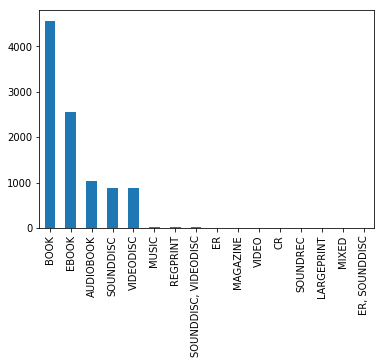

In [28]:
checkouts_df["materialtype"].value_counts().plot(kind="bar")

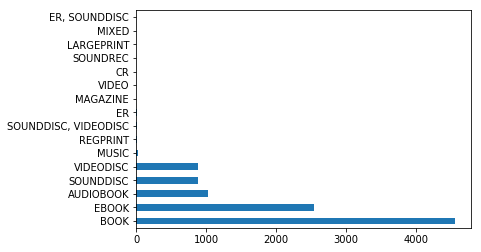

In [29]:
checkouts_df["materialtype"].value_counts().plot(kind="barh")

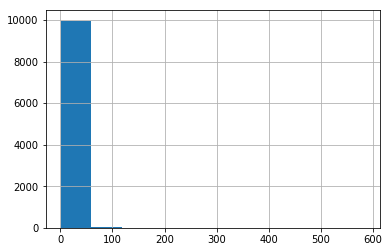

In [30]:
checkouts_df["checkouts"].hist()

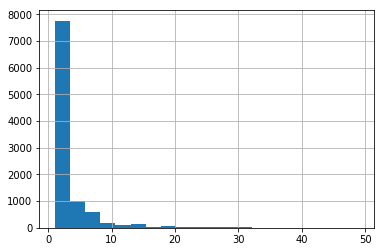

In [39]:
checkouts_df[checkouts_df["checkouts"] < 50 ]["checkouts"].hist(bins=20)

## Storing API query results of the invetory as CSV file and loading it into pandas DataFrame

In [58]:
url = "https://data.seattle.gov/resource/6vkj-f5xf.csv?$limit=100"
inventory_file = "inventory.csv"
urllib.request.urlretrieve(url, inventory_file)

('inventory.csv', <http.client.HTTPMessage at 0x7ff7ef566e10>)

In [59]:
inventory_df = pd.read_csv(inventory_file)

In [60]:
inventory_df

,bibnum,title,author,isbn,publicationyear,publisher,subjects,itemtype,itemcollection,floatingitem,itemlocation,reportdate,itemcount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,2017-09-01T00:00:00.000,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,2017-09-01T00:00:00.000,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,2017-09-01T00:00:00.000,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,2017-09-01T00:00:00.000,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
5,1736505,Children of Cambodia's killing fields : memoir...,NaN,"0300068395, 0300078730",c1997.,"Yale University Press,","Political atrocities Cambodia, Children Cambod...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
6,1749492,Anti-Zionism : analytical reflections / editor...,NaN,091559773X,c1989.,"Amana Books,","Berger Elmer 1908 1996, Zionism Controversial ...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
7,3270562,Hard-hearted Highlander / Julia London.,"London, Julia","0373789998, 037380394X, 9780373789993, 9780373...",[2017],"HQN,","Man woman relationships Fiction, Betrothal Fic...",acbk,nanew,NaN,lcy,2017-09-01T00:00:00.000,1
8,3264577,The Sandcastle Empire / Kayla Olson.,"Olson, Kayla","0062484877, 9780062484871",2017.,"HarperTeen,","Survival Juvenile fiction, Islands Juvenile fi...",acbk,nynew,NaN,nga,2017-09-01T00:00:00.000,1
9,3236819,Doctor Who. The return of Doctor Mysterio / BB...,NaN,NaN,[2017],"BBC Worldwide,","Doctor Fictitious character Drama, Time travel...",acdvd,nadvd,Floating,wts,2017-09-01T00:00:00.000,2


In [61]:
inventory_df.shape

(100, 13)

In [62]:
# Just checking if the file size is okay
! du -h inventory.csv

36K	inventory.csv


In [64]:
inventory_df.author

0                              O'Ryan, Ellie
1                  Kishimoto, Masashi, 1974-
2                        Scott, Jerry, 1955-
3                     Carlile, Clancy, 1930-
4                                        NaN
5                                        NaN
6                                        NaN
7                              London, Julia
8                               Olson, Kayla
9                                        NaN
10                           Flinn, Kathleen
11                                       NaN
12                                       NaN
13                             Pyper, Andrew
14                             Duddle, Jonny
15                                       NaN
16                    Masson, Cynthea, 1962-
17          Toft, Catherine Ann, 1950-2011,,
18                            Keville, Kathi
19                           Kirkman, Robert
20                             Brooks, Kevin
21                               Jose, Maia.
22        

In [69]:
inventory_df.isbn.str.split(",")

0     [1481425730,  1481425749,  9781481425735,  978...
1                                          [1569319006]
2                          [144945867X,  9781449458676]
3                                          [0786706155]
4                                          [094020813X]
5                             [0300068395,  0300078730]
6                                          [091559773X]
7     [0373789998,  037380394X,  9780373789993,  978...
8                          [0062484877,  9780062484871]
9                                                   NaN
10                         [067001544X,  9780670015443]
11                                                  NaN
12                                                  NaN
13                         [1476755213,  9781476755212]
14                         [0763692921,  9780763692926]
15                         [1942556195,  9781942556190]
16                         [1770412719,  9781770412712]
17                         [0520239253,  9780520